# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = (f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}&q=")

In [4]:
# Set up lists to store data pulled for each city
names = []
lat = []
lng = []
max_temp = []
humidity = []
clouds = []
wind = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
print(f"Beginning Data Retrieval\n----------------------------")
for city in cities: 
    try:
        response = requests.get(url + city).json()
        names.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record {cities.index(city)+1} | {city}")
    except:
        print(f"City: {city} (record {cities.index(city)+1}) not found. Skipping...")
print(f"----------------------------\nData Retrieval Complete\n----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 | harper
Processing Record 2 | jamestown
City: khormuj (record 3) not found. Skipping...
Processing Record 4 | vuktyl
Processing Record 5 | port lincoln
Processing Record 6 | lebu
Processing Record 7 | hobart
Processing Record 8 | cape town
Processing Record 9 | heihe
Processing Record 10 | santa isabel do rio negro
City: taolanaro (record 11) not found. Skipping...
Processing Record 12 | chokurdakh
Processing Record 13 | kibala
Processing Record 14 | hilo
Processing Record 15 | busselton
Processing Record 16 | rikitea
Processing Record 17 | hasaki
Processing Record 18 | mayo
Processing Record 19 | detva
Processing Record 20 | butaritari
Processing Record 21 | georgetown
Processing Record 22 | jever
Processing Record 23 | arraial do cabo
Processing Record 24 | ushuaia
Processing Record 25 | bowen
City: illoqqortoormiut (record 26) not found. Skipping...
Processing Record 27 | bambous virieux
City: mys shmidta (re

Processing Record 240 | riyadh
Processing Record 241 | lichuan
Processing Record 242 | kushmurun
Processing Record 243 | road town
Processing Record 244 | padang
Processing Record 245 | eastbourne
Processing Record 246 | kango
Processing Record 247 | sligo
Processing Record 248 | valparaiso
Processing Record 249 | zyryanka
Processing Record 250 | laguna
Processing Record 251 | hella
Processing Record 252 | shreveport
Processing Record 253 | vao
Processing Record 254 | omis
Processing Record 255 | edwardsville
Processing Record 256 | tuy hoa
Processing Record 257 | kavieng
Processing Record 258 | sucre
Processing Record 259 | ixtapa
Processing Record 260 | nikolskoye
Processing Record 261 | tabas
Processing Record 262 | baykit
Processing Record 263 | kloulklubed
Processing Record 264 | funadhoo
Processing Record 265 | kanigiri
Processing Record 266 | san carlos de bariloche
Processing Record 267 | high level
Processing Record 268 | maltahohe
Processing Record 269 | mahebourg
Processing 

Processing Record 480 | ulaangom
Processing Record 481 | viedma
Processing Record 482 | meulaboh
Processing Record 483 | guerrero negro
Processing Record 484 | cape coast
Processing Record 485 | chapais
Processing Record 486 | san quintin
Processing Record 487 | chambersburg
Processing Record 488 | yancheng
Processing Record 489 | bambanglipuro
City: samalaeulu (record 490) not found. Skipping...
Processing Record 491 | bandarbeyla
City: kazalinsk (record 492) not found. Skipping...
City: bolungarvik (record 493) not found. Skipping...
Processing Record 494 | tessalit
Processing Record 495 | calabozo
Processing Record 496 | yenagoa
Processing Record 497 | eten
Processing Record 498 | bubaque
Processing Record 499 | cap malheureux
Processing Record 500 | kaitangata
Processing Record 501 | madimba
Processing Record 502 | pacific grove
Processing Record 503 | chicama
Processing Record 504 | mae sai
Processing Record 505 | juneau
City: warqla (record 506) not found. Skipping...
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
# Create dataframe with city, latitude, longitude, max temp, humidity, cloudiness, windspeed, and date
weather_dict = {
    "City": names,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind, 
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv(output_data_file, index=False)

weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Harper,4.3750,-7.7169,78.75,87,29,7.52,LR,1644455923
1,Jamestown,42.0970,-79.2353,42.39,37,0,11.50,US,1644455914
2,Vuktyl,63.8567,57.3094,16.74,88,100,16.31,RU,1644456474
3,Port Lincoln,-34.7333,135.8667,69.13,52,46,9.22,AU,1644456475
4,Lebu,-37.6167,-73.6500,59.85,81,28,21.14,CL,1644455768
...,...,...,...,...,...,...,...,...,...
546,Evensk,61.9500,159.2333,-5.49,74,62,2.91,RU,1644455835
547,Nueve de Julio,-35.4444,-60.8831,69.71,52,0,8.75,AR,1644456616
548,Mogadishu,2.0371,45.3438,76.35,77,100,20.74,SO,1644456059
549,Cuamba,-14.8031,36.5372,68.97,99,100,1.88,MZ,1644456617


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
hum_over = weather_data[weather_data['Humidity']>100]
hum_over

# No cities with humidity >100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

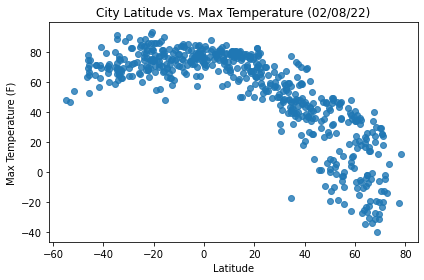

In [10]:
plt.scatter(lat,max_temp, alpha=0.8)
plt.title('City Latitude vs. Max Temperature (02/08/22)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.tight_layout()
plt.savefig("../output_data/Lat_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

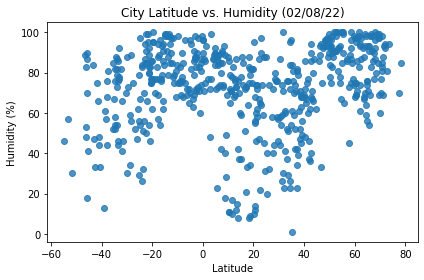

In [11]:
plt.scatter(lat,humidity, alpha=0.8)
plt.title('City Latitude vs. Humidity (02/08/22)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.savefig("../output_data/Lat_Humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

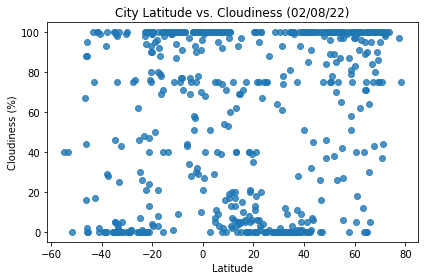

In [12]:
plt.scatter(lat,clouds, alpha=0.8)
plt.title('City Latitude vs. Cloudiness (02/08/22)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
plt.savefig("../output_data/Lat_Cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

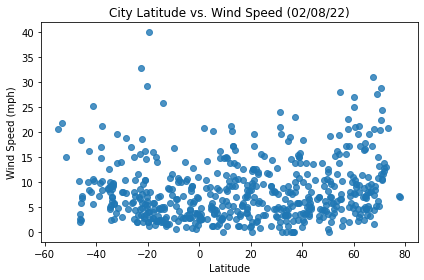

In [13]:
plt.scatter(lat,wind, alpha=0.8)
plt.title('City Latitude vs. Wind Speed (02/08/22)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
plt.savefig("../output_data/Lat_Wind.png")
plt.show()

## Linear Regression

In [14]:
#Creating Northern Hemisphere and Souther Hemisphere Databases
north_hem = weather_data[weather_data['Lat']>0]
south_hem = weather_data[weather_data['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

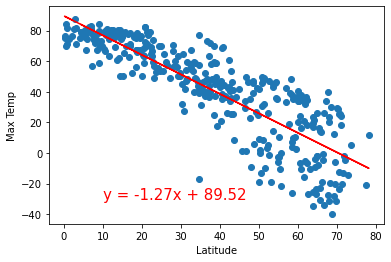

The r-squared value is 0.7255628075267452


In [15]:
#Create Scatter Plot
plt.scatter(north_hem['Lat'], 
            north_hem['Max Temp'])

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_hem['Lat'],north_hem['Max Temp'])
#print(slope, intercept, rvalue, pvalue, stderr)

# Create Linear Regression Plot and Equation String
line_n = slope * north_hem['Lat']+intercept
plt.plot(north_hem['Lat'],line_n,color='red')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")

#Labels for chart
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

#Save to PNG
plt.savefig("../output_data/Lat_Temp_North.png")
plt.show()

#Calculating r-squared value
r_2 = rvalue**2
print(f"The r-squared value is {r_2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

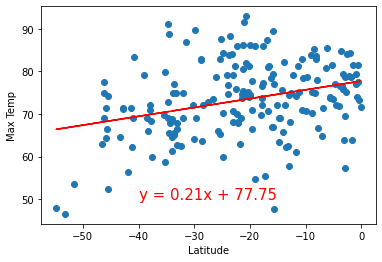

The r-squared value is 0.0993540888805853


In [16]:
#Create Scatter Plot
plt.scatter(south_hem['Lat'], 
            south_hem['Max Temp'])

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_hem['Lat'],south_hem['Max Temp'])
#print(slope, intercept, rvalue, pvalue, stderr)

# Create Linear Regression Plot and Equation String
line_s = slope * south_hem['Lat']+intercept
plt.plot(south_hem['Lat'],line_s,color='red')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")

#Labels for chart
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

#Save to PNG
plt.savefig("../output_data/Lat_Temp_South.png")
plt.show()

#Calculating r-squared value
r_2 = rvalue**2
print(f"The r-squared value is {r_2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

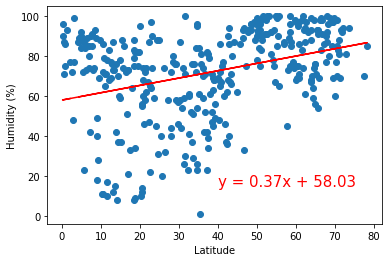

The r-squared value is 0.11796474252832732


In [17]:
#Create Scatter Plot
plt.scatter(north_hem['Lat'], 
            north_hem['Humidity'])

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_hem['Lat'],north_hem['Humidity'])
#print(slope, intercept, rvalue, pvalue, stderr)

# Create Linear Regression Plot and Equation String
line_n = slope * north_hem['Lat']+intercept
plt.plot(north_hem['Lat'],line_n,color='red')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

#Labels for chart
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Save to PNG
plt.savefig("../output_data/Lat_Humid_North.png")
plt.show()

#Calculating r-squared value
r_2 = rvalue**2
print(f"The r-squared value is {r_2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

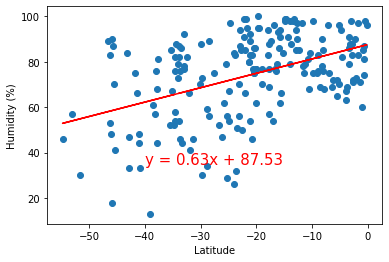

The r-squared value is 0.20668461979976707


In [18]:
#Create Scatter Plot
plt.scatter(south_hem['Lat'], 
            south_hem['Humidity'])

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_hem['Lat'],south_hem['Humidity'])
#print(slope, intercept, rvalue, pvalue, stderr)

# Create Linear Regression Plot and Equation String
line_s = slope * south_hem['Lat']+intercept
plt.plot(south_hem['Lat'],line_s,color='red')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-40,35),fontsize=15,color="red")

#Labels for chart
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Save to PNG
plt.savefig("../output_data/Lat_Humid_South.png")
plt.show()

#Calculating r-squared value
r_2 = rvalue**2
print(f"The r-squared value is {r_2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

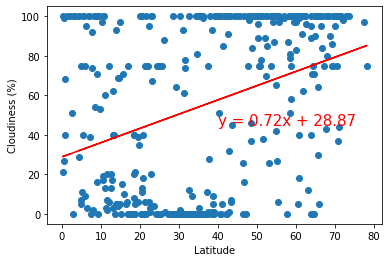

The r-squared value is 0.12974468995018876


In [19]:
#Create Scatter Plot
plt.scatter(north_hem['Lat'], 
            north_hem['Cloudiness'])

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_hem['Lat'],north_hem['Cloudiness'])
#print(slope, intercept, rvalue, pvalue, stderr)

# Create Linear Regression Plot and Equation String
line_n = slope * north_hem['Lat']+intercept
plt.plot(north_hem['Lat'],line_n,color='red')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40,45),fontsize=15,color="red")

#Labels for chart
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#Save to PNG
plt.savefig("../output_data/Lat_Cloud_North.png")
plt.show()

#Calculating r-squared value
r_2 = rvalue**2
print(f"The r-squared value is {r_2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

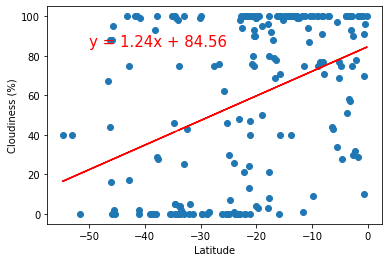

The r-squared value is 0.1575594813584873


In [20]:
#Create Scatter Plot
plt.scatter(south_hem['Lat'], 
            south_hem['Cloudiness'])

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_hem['Lat'],south_hem['Cloudiness'])
#print(slope, intercept, rvalue, pvalue, stderr)

# Create Linear Regression Plot and Equation String
line_s = slope * south_hem['Lat']+intercept
plt.plot(south_hem['Lat'],line_s,color='red')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")

#Labels for chart
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#Save to PNG
plt.savefig("../output_data/Lat_Cloud_South.png")
plt.show()

#Calculating r-squared value
r_2 = rvalue**2
print(f"The r-squared value is {r_2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

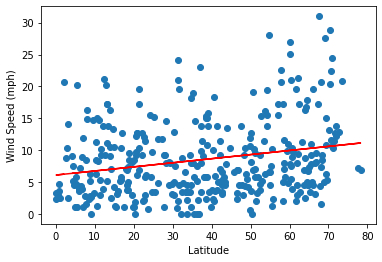

The r-squared value is 0.05085074088500264


In [21]:
#Create Scatter Plot
plt.scatter(north_hem['Lat'], 
            north_hem['Wind Speed'])

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_hem['Lat'],north_hem['Wind Speed'])
#print(slope, intercept, rvalue, pvalue, stderr)

# Create Linear Regression Plot and Equation String
line_n = slope * north_hem['Lat']+intercept
plt.plot(north_hem['Lat'],line_n,color='red')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(15,40),fontsize=15,color="red")

#Labels for chart
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#Save to PNG
plt.savefig("../output_data/Lat_Wind_North.png")
plt.show()

#Calculating r-squared value
r_2 = rvalue**2
print(f"The r-squared value is {r_2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

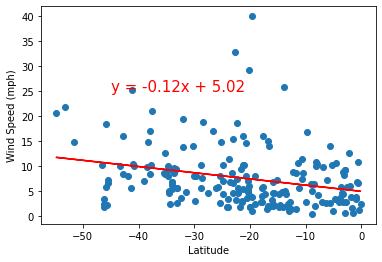

The r-squared value is 0.07474777756459956


In [22]:
#Create Scatter Plot
plt.scatter(south_hem['Lat'], 
            south_hem['Wind Speed'])

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_hem['Lat'],south_hem['Wind Speed'])
#print(slope, intercept, rvalue, pvalue, stderr)

# Create Linear Regression Plot and Equation String
line_s = slope * south_hem['Lat']+intercept
plt.plot(south_hem['Lat'],line_s,color='red')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-45,25),fontsize=15,color="red")

#Labels for chart
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#Save to PNG
plt.savefig("../output_data/Lat_Wind_South.png")
plt.show()

#Calculating r-squared value
r_2 = rvalue**2
print(f"The r-squared value is {r_2}")